In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
sns.set_style("whitegrid")
df = pd.read_csv('clean_drug_consumption.csv')
df.head()

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Education Level
0,0,1,35-44,Female,-0.05921,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,...,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,Professional Certificate/ Diploma
1,1,2,25-34,Male,1.98437,UK,White,-0.67825,1.93886,1.43533,...,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,Doctorate Degree
2,2,3,35-44,Male,-0.05921,UK,White,-0.46725,0.80523,-0.84732,...,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,Professional Certificate/ Diploma
3,3,4,18-24,Female,1.16365,UK,White,-0.14882,-0.80615,-0.01928,...,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,Masters Degree
4,4,5,35-44,Female,1.98437,UK,White,0.73545,-1.63340,-0.45174,...,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,Doctorate Degree


In [2]:
df["Mushrooms"].value_counts()

CL0    982
CL3    275
CL2    260
CL1    209
CL4    115
CL5     40
CL6      4
Name: Mushrooms, dtype: int64

In [3]:
def hasTrippedMushrooms(x):
    if x == "CL0" or x == "CL1" or x == "CL2" or x == "CL3":
        return 0
    else:
        return 1 


0    1726
1     159
Name: Tripped Shrooms?, dtype: int64

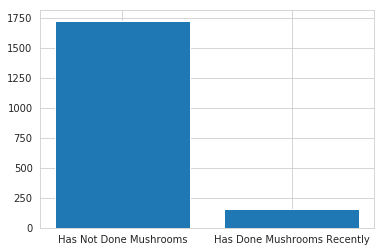

In [8]:
df["Tripped Shrooms?"] = df["Mushrooms"].apply(hasTrippedMushrooms)
df["Tripped Shrooms?"].value_counts()
xvals = ["Has Not Done Mushrooms", "Has Done Mushrooms Recently"]
plt.bar(xvals, df["Tripped Shrooms?"].value_counts())
#plt.set_title("Have ")
#df.head()
df["Tripped Shrooms?"].value_counts()

0    1719
1     166
Name: Tripped LSD?, dtype: int64

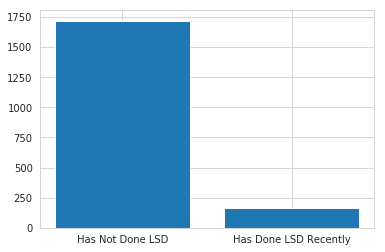

In [7]:
def hasTrippedLSD(x):
    if x == "CL0" or x == "CL1" or x == "CL2" or x == "CL3":
        return 0
    else:
        return 1  

df["Tripped LSD?"] = df["LSD"].apply(hasTrippedLSD)
df["Tripped LSD?"].value_counts()
xvals = ["Has Not Done LSD", "Has Done LSD Recently"]

plt.bar(xvals, df["Tripped LSD?"].value_counts())
df["Tripped LSD?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

# Insight 
More people have done mushrooms than LSD before 

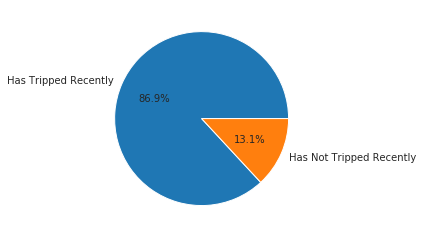

In [10]:
def hasTripped(x):
    if x == "CL0":
        return 0
    else:
        return 1 
def isolate(x): 
    if x == 1 or x ==2: 
        return 1 
    else: 
        return 0 
    
df["Tripped?"] = df["Tripped Shrooms?"] + df["Tripped LSD?"] 
df["Tripped?"] = df["Tripped?"].apply(isolate)

df["Tripped?"].value_counts()
xvals = ["Has Tripped Recently", "Has Not Tripped Recently"]

plt.pie(df["Tripped?"].value_counts(), labels = xvals, autopct='%1.1f%%');

#df["Tripped?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

0    1638
1     169
2      78
Name: Tripped on how many?, dtype: int64

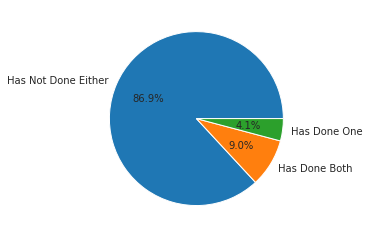

In [11]:
def hasTripped(x):
    if x == "CL0":
        return 0
    else:
        return 1 

df["Tripped on how many?"] = df["Tripped Shrooms?"] + df["Tripped LSD?"] 
df["Tripped on how many?"].value_counts()
xvals = ["Has Not Done Either", "Has Done Both", "Has Done One"]

plt.pie(df["Tripped on how many?"].value_counts(), labels = xvals,autopct='%1.1f%%')
df["Tripped on how many?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

In [13]:
print("Openness Score of People Who Have Tripped in the Past Month")
df[df["Tripped?"] == 1]['Oscore'].mean()

Openness Score of People Who Have Tripped in the Past Month


0.6717557489878543

In [14]:
print("Openness Score of People Who Have Never Tripped in the Past Month")
df[df["Tripped?"] == 0]['Oscore'].mean()

Openness Score of People Who Have Never Tripped in the Past Month


-0.101911483516483

In [23]:
mean_diff = df[df["Tripped?"] == 1]['Oscore'].mean() - df[df["Tripped?"] == 0]['Oscore'].mean()

In [15]:
print("Mean Openness Score")
df['Oscore'].mean()

Mean Openness Score


-0.0005343978779840978

In [16]:
df[df["Tripped?"] == 1][:].mean() - df[:].mean()

Unnamed: 0              250.477733
ID                      251.085607
Education                -0.360083
Nscore                    0.016672
Escore                    0.060208
Oscore                    0.672290
Ascore                   -0.130396
Cscore                   -0.313541
Impulsive                 0.329636
SS                        0.584569
Tripped Shrooms?          0.559375
Tripped LSD?              0.584001
Tripped?                  0.868966
Tripped on how many?      1.143376
dtype: float64

# Affect of Tripping 
It seems that the average openness of a psychedelic user is much higher than any other category 

In [17]:
np.std(df[df["Tripped?"] == 1]['Oscore'])

0.8283744151003579

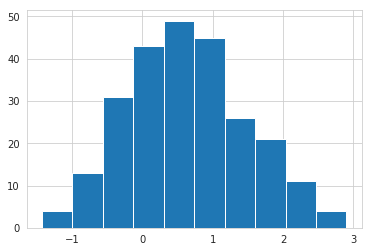

In [18]:
fig, ax = plt.subplots()
ax = plt.hist(df[df["Tripped?"] == 1]['Oscore'])

(array([  6.,  33., 125., 236., 322., 405., 284., 178.,  37.,  12.]),
 array([-3.27393 , -2.656376, -2.038822, -1.421268, -0.803714, -0.18616 ,
         0.431394,  1.048948,  1.666502,  2.284056,  2.90161 ]),
 <a list of 10 Patch objects>)

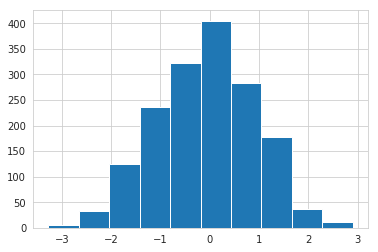

In [19]:
plt.hist(df[df["Tripped?"] == 0]['Oscore'])

# Psychedelic Openness Hypothesis Testing 


Null Hypothesis H0: that the mean openness for non-psychedelic users = the mean openness for psychedelic users 
Ha: Psych users are more open 

In [20]:
var0 = (np.var(df[df["Tripped?"] == 0]['Oscore']))/len(df[df["Tripped?"] == 0]['Oscore'])
var1 = (np.var(df[df["Tripped?"] == 1]['Oscore']))/len(df[df["Tripped?"] == 1]['Oscore'])

shared_sample_variance = var0 + var1
#print(shared_sample_variance)
diff_in_Oscore = stats.norm(0, np.sqrt(shared_sample_variance))




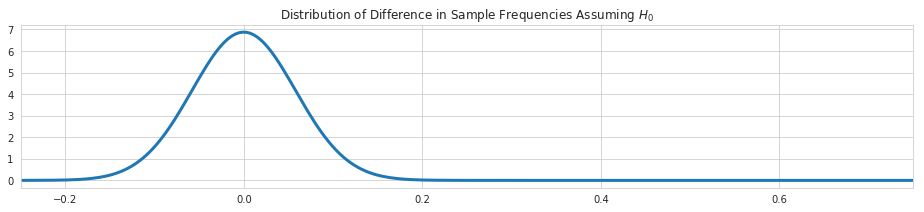

In [24]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-0.25, 0.75, num=250)
ax.plot(x, diff_in_Oscore.pdf(x), linewidth=3)
ax.set_xlim(-0.25, 0.75)
ax.axvline(mean_diff)

ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$");

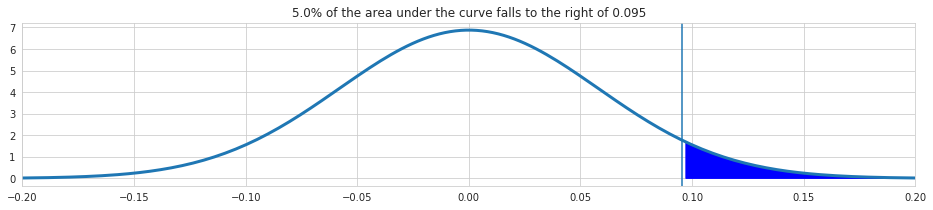

In [25]:
𝛼 = 0.05
x = np.linspace(-3, 3, num=2500)
threshold = diff_in_Oscore.ppf(1-𝛼)

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, diff_in_Oscore.pdf(x), linewidth=3)
ax.axvline(threshold)
ax.set_xlim(-0.2, 0.20)
ax.fill_between(x, 0, diff_in_Oscore.pdf(x), x>threshold, color = 'blue')
ax.set_title(f'{100*𝛼}% of the area under the curve falls to the right of {round(threshold,3)}');

In [26]:
mean_diff = df[df["Tripped?"] == 1]['Oscore'].mean() - df[df["Tripped?"] == 0]['Oscore'].mean()
mean_diff

0.7736672325043373

In [27]:
p_value = 1 - diff_in_Oscore.cdf(mean_diff)
p_value 
#print("p-value for openness comparison: {:2.3f}".format(p_value))

0.0

In [28]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Oscore'], df[df["Tripped?"] == 0]['Oscore'])
tdiff_in_Oscore[1]

5.458997152537601e-31

In [29]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Impulsive'], df[df["Tripped?"] == 0]['Impulsive'])
tdiff_in_Oscore[1]

5.005599850878441e-09

In [30]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['SS'], df[df["Tripped?"] == 0]['SS'])
tdiff_in_Oscore[1]

3.4289266692559324e-25

In [31]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Ascore'], df[df["Tripped?"] == 0]['Ascore'])
tdiff_in_Oscore[1]

0.027481504120490073

In [32]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Cscore'], df[df["Tripped?"] == 0]['Cscore'])
tdiff_in_Oscore[1]

1.0543835776106146e-07

In [33]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Nscore'], df[df["Tripped?"] == 0]['Nscore'])
tdiff_in_Oscore[1]

0.7783157313051474

In [34]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Escore'], df[df["Tripped?"] == 0]['Escore'])
tdiff_in_Oscore[1]

0.30895897099541286

In [35]:
df[df["Tripped?"] == 1][:].mean() - df[:].mean()

Unnamed: 0              250.477733
ID                      251.085607
Education                -0.360083
Nscore                    0.016672
Escore                    0.060208
Oscore                    0.672290
Ascore                   -0.130396
Cscore                   -0.313541
Impulsive                 0.329636
SS                        0.584569
Tripped Shrooms?          0.559375
Tripped LSD?              0.584001
Tripped?                  0.868966
Tripped on how many?      1.143376
dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 38 columns):
Unnamed: 0              1885 non-null int64
ID                      1885 non-null int64
Age                     1885 non-null object
Gender                  1885 non-null object
Education               1885 non-null float64
Country                 1885 non-null object
Ethnicity               1885 non-null object
Nscore                  1885 non-null float64
Escore                  1885 non-null float64
Oscore                  1885 non-null float64
Ascore                  1885 non-null float64
Cscore                  1885 non-null float64
Impulsive               1885 non-null float64
SS                      1885 non-null float64
Alcohol                 1885 non-null object
Amphet                  1885 non-null object
Amyl                    1885 non-null object
Benzos                  1885 non-null object
Caff                    1885 non-null object
Cannabis                1885 non

In [38]:
df.to_csv('drug_consumption_with_monthly_trip_rate.csv')


In [41]:
df["Tripped?"].value_counts()

0    1638
1     247
Name: Tripped?, dtype: int64

# Tests to see if tripping in the past month changes your odds of drinking in the past day

In [42]:
def hasDoneAlcInPastDay(x):
    if x == "CL0" or x == "CL1" or x == "CL2" or x == "CL3" or x == "CL4" or x == "CL5":
        return 0
    else:
        return 1 
df["AlcToday?"] = df["Alcohol"].apply(hasDoneAlcInPastDay)
df["AlcToday?"].value_counts()
#xvals = ["Has Not Done Meth in the Past Week", "Has Done Meth in the Past Week"]
#plt.bar(xvals, df["MethInThePastWeek?"].value_counts())
#plt.set_title("Have ")
#df.head()
#df[df[df["CokeInThePastWeek?"]==1]["Tripped?"] ==1]
counts = df[df["Tripped?"]==1]["AlcToday?"].value_counts()
print(counts[1] / (counts[0]+counts[1]))

print(counts)

0.27530364372469635
0    179
1     68
Name: AlcToday?, dtype: int64


In [43]:
counts = df[df["Tripped?"]==0]["AlcToday?"].value_counts()
print(counts[1] / (counts[0]+counts[1]))

print(counts)

0.2667887667887668
0    1201
1     437
Name: AlcToday?, dtype: int64
